# Model Development

# 1. Predict Car Price based on highway-mpg

In [1]:
import pandas as pd
import numpy as np

In [2]:
path = "Auto85.csv"
df = pd.read_csv(path, header = None) #read_csv() assumes data has a header

In [3]:
headers = ["symboling","normalized-losses","make","fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels","engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "Price"]

In [4]:
df.columns = headers

In [5]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Preprocessing

- Check highway-mpg and price column
- Should be numeric
- Should not contain any missing data

In [6]:
# Consider highway-mpg for price prediction
df["highway-mpg"]

0      27
1      27
2      26
3      30
4      22
       ..
200    28
201    25
202    23
203    27
204    25
Name: highway-mpg, Length: 205, dtype: int64

In [7]:
# Check missing values
df["highway-mpg"].isnull().sum()

0

In [8]:
# Check for price column
df["Price"].dtype

dtype('O')

In [9]:
# Convert price column to numeric
df["Price"].replace("?", np.nan, inplace = True)
df["Price"] = pd.to_numeric(df["Price"])

In [10]:
# Check for missing values in Price column
df["Price"].isnull().sum()

4

In [11]:
# Drop missing values rows
df.dropna(subset=["Price"], axis=0, inplace = True)

In [12]:
# Check for missing values in Price column
df["Price"].isnull().sum()

0

# Using Scikit Learn Library for Linear Regression

In [13]:
# Import Linear Model from Scikit Learn
from sklearn.linear_model import LinearRegression

In [14]:
# Create a Linear Regression Object
linear_model = LinearRegression()

In [15]:
# Define X as feature set and Y as target variable
X = df[ ["highway-mpg"] ]
Y = df["Price"]

In [16]:
# Model Fit
linear_model.fit(X,Y)

LinearRegression()

In [17]:
print("c_0 = ", linear_model.intercept_)
print("c_1 = ", linear_model.coef_)

c_0 =  38423.305858157386
c_1 =  [-821.73337832]


Predicted_Price = c0 + c1 * highway-mpg
c0 = 38423.305858157386
c1 = -821.73337832

So,
Predicted_Price = 38423.305 - 821.73 * highway-mpg

# Predict Price for Unknown Value of Highway-mpg

In [18]:
# Predict Price of a car for highway-mpg = 30
linear_model.predict(np.array([[30]]))

C:\Users\Hamza\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13771.3045085])

# Multiple Linear Regression
- Predict price of a car based on horsepower, curb-weight, engine-size,highway-mpg
- Make sure to check the types of all columns

In [19]:
df[["horsepower","curb-weight","engine-size","highway-mpg"]].dtypes

horsepower     object
curb-weight     int64
engine-size     int64
highway-mpg     int64
dtype: object

In [20]:
# Convert horsepower column to numeric
df["horsepower"].replace("?", np.nan, inplace = True)
df["horsepower"] = pd.to_numeric(df["horsepower"])

In [21]:
# Check for missing values in horsepower column
df["horsepower"].isnull().sum()

2

In [22]:
avg_hp = df["horsepower"].mean()
avg_hp

103.39698492462311

In [23]:
df["horsepower"].replace(np.nan, avg_hp, inplace = True)

In [24]:
# Check for missing values in horsepower column
df["horsepower"].isnull().sum()

0

In [25]:
# Check for NaN or missing values for other attributes
print(df["curb-weight"].isnull().sum())
print(df["engine-size"].isnull().sum())
print(df["highway-mpg"].isnull().sum())
print(df["Price"].isnull().sum())

0
0
0
0


In [26]:
Z = df[["horsepower","curb-weight","engine-size","highway-mpg"]]

In [27]:
linear_model.fit(Z,Y)

LinearRegression()

In [28]:
print("c_0 = ", linear_model.intercept_)
print("c_{1-4} = ", linear_model.coef_)

c_0 =  -15824.03820823448
c_{1-4} =  [53.61042729  4.70886444 81.47225667 36.39637823]


In [29]:
linear_model.predict(np.array([[400,24,1000,12]]))

C:\Users\Hamza\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([87642.15866469])

# Model Evaluation

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
# 1. Mean Squared Error (MSE)
Y_hat = linear_model.predict(Z)
mean_squared_error(df["Price"], Y_hat)

11976801.681229591

In [32]:
# 2. R Squared
linear_model.score(Z,Y)

0.8094130135602673

# Model Evaluation using Visualization

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

(0.0, 48172.42363655801)

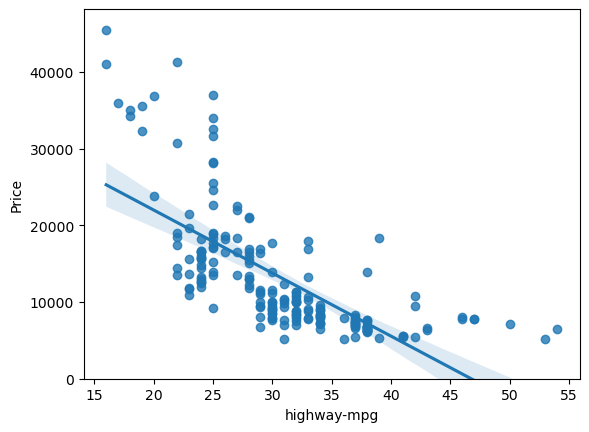

In [35]:
sns.regplot(x="highway-mpg", y = "Price", data = df)
plt.ylim(0,)

C:\Users\Hamza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='engine-size', ylabel='Price'>

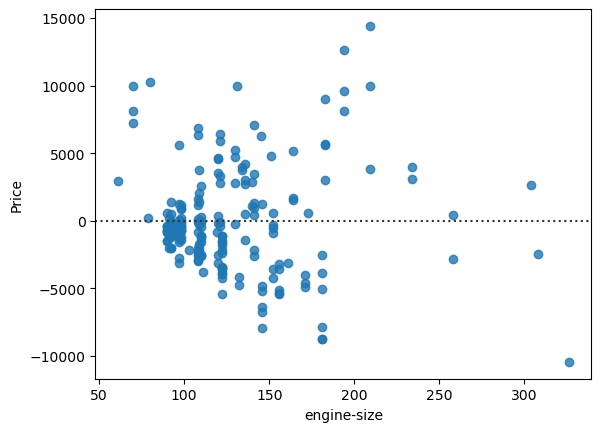

In [36]:
# Residual Plot
sns.residplot(df["engine-size"],df["Price"])

C:\Users\Hamza\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Hamza\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

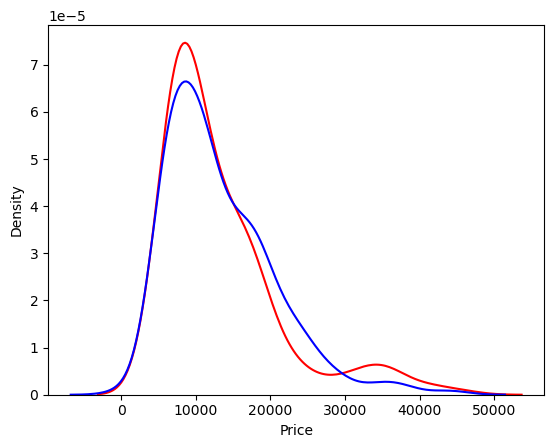

In [37]:
# Distributon Plot
import seaborn as sns
ax1 = sns.distplot(df["Price"], hist=False, color="r", label="Actual Values")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Value", ax=ax1)